# Welcome to Our Data-Driven Insight Journey
Welcome to this interactive report, designed to guide you through our latest data analysis. As a data scientist at XYZ Company, my role is to transform complex data into clear, actionable insights. This notebook is tailored for our non-technical team members, providing an accessible overview of how data informs our strategic decisions.

## What is this Notebook About?
This notebook presents a series of analyses focused on key areas impacting our business and environment. It's structured to help us understand and visualize data in a way that's relevant and easy to grasp, regardless of your technical background.

## Why is this Important?
In today's data-driven world, making informed decisions is critical for success. By leveraging data, we can uncover trends, identify opportunities, and make predictions that guide our company towards sustainable growth and innovation.

## How to Navigate this Report
Each section in this report is divided into two parts:
1. **Narrative**: A brief explanation in simple language about what the analysis is and why it's important.
2. **Data Visualization and Analysis**: Charts and graphs accompanied by a summary of key findings.

Remember, this report is interactive! You can explore the data and visualizations at your own pace. If you have any questions or need further explanations, feel free to reach out to the Data Science team.

Let's dive in and explore what our data has to tell us!


# 1- setup to work

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
import plotly.figure_factory as ff


In [ ]:
# Set the style of the seaborn plots
sns.set_style("whitegrid")  # Set a background grid for a clean look

# Set the color palette for the seaborn plots
sns.set_palette("husl")  # Colorblind-friendly palette

# Set the context for plotting
sns.set_context("notebook", font_scale=1.2)  # Adjust font scale for notebook context

# Set Matplotlib defaults
plt.rcParams['figure.figsize'] = [10, 6]  # Default figure size for plots
plt.rcParams['figure.titlesize'] = 'large'  # Default title size
plt.rcParams['axes.titlesize'] = 'medium'  # Default axes title size
plt.rcParams['axes.labelsize'] = 'medium'  # Default label size for x and y axes
plt.rcParams['xtick.labelsize'] = 'small'  # Default x-tick label size
plt.rcParams['ytick.labelsize'] = 'small'  # Default y-tick label size
plt.rcParams['legend.fontsize'] = 'medium'  # Default legend font size
plt.rcParams['axes.grid'] = True  # Enable grid by default


# 2- Data Preprocessing: Setting the Foundation for Analysis

Before diving into the analysis, let's talk about an important step called 'Data Preprocessing'. Think of it as preparing the ingredients before cooking a meal. Just like how we need to wash and chop vegetables before cooking, we need to prepare our data to ensure it's clean and in the right format for analysis.

## What Data Are We Looking At?
Our dataset, a fusion of various types of information relevant to our business operations and environmental factors, is derived from an extensive compilation of data from the World Bank. This rich dataset provides insights into key areas such as sales figures, customer demographics, industry trends, and environmental impact. While we have sourced detailed and comprehensive data for our analysis, this report focuses on presenting these insights in a simplified and accessible manner for all team members, regardless of their technical background. The technical aspects of data extraction and compilation from various World Bank pages, though integral to our analysis, have been streamlined in this report to maintain clarity and ease of understanding.

## Why Preprocess Data?
1. **Cleaning**: Sometimes, data can have errors or missing pieces. We clean it to ensure accuracy.
2. **Organizing**: We organize the data in a structured format, making it easier to analyze.
3. **Transforming**: We sometimes need to change the data's format or create new data points for better insights.

## The Outcome
After preprocessing, we have a reliable and well-structured dataset. This makes our analysis more accurate and our conclusions more trustworthy. It's a vital step to ensure that the insights you'll see in the following sections are based on solid data.


In [ ]:
# Load the dataset
data = pd.read_csv('data2.csv',index_col=0)  # Replace with your file path
data.head()

Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  Forest area (% of land area)   
1  Africa Eastern and Southern          AFE  Forest area (% of land area)   
2                  Afghanistan          AFG  Forest area (% of land area)   
3   Africa Western and Central          AFW  Forest area (% of land area)   
4                       Angola          AGO  Forest area (% of land area)   

   Indicator Code       2000       2001       2002       2003       2004  \
0  AG.LND.FRST.ZS   2.333333   2.333333   2.333333   2.333333   2.333333   
1  AG.LND.FRST.ZS  34.717473  34.537463  34.357452  34.177441  33.654274   
2  AG.LND.FRST.ZS   1.852782   1.852782   1.852782   1.852782   1.852782   
3  AG.LND.FRST.ZS  21.595284  21.503156  21.411029  21.318902  21.226775   
4  AG.LND.FRST.ZS  62.331443  61.886219  61.440995  60.995770  60.550546   

        2005  ...       2014       2015       2016       2017       2018  \
0   2.333333  ...   2.333333   2.333333   2.333333   2.333333   2.333333   
1  33.475977  ...  31.470634  31.260420  31.039682  30.824316  30.611512   
2   1.852782  ...   1.852782   1.852782   1.852782   1.852782   1.852782   
3  21.134648  ...  20.322187  20.234231  20.152610  20.071327  19.986100   
4  60.105322  ...  56.098301  55.653076  55.207845  54.762629  54.317406   

        2019       2020       2021                      Region  \
0   2.333333   2.333333   2.333333  Latin America & Caribbean    
1  30.391626  30.174253  29.955194                  Aggregates   
2   1.852782   1.852782   1.852782                  South Asia   
3  19.901215  19.816777  19.732037                  Aggregates   
4  53.872175  53.426951  52.981722         Sub-Saharan Africa    

          Income Level  
0          High Income  
1  Lower-Middle Income  
2           Low Income  
3  Lower-Middle Income  
4  Lower-Middle Income  

[5 rows x 28 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1329
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1330 non-null   object 
 1   Country Code    1330 non-null   object 
 2   Indicator Name  1330 non-null   object 
 3   Indicator Code  1330 non-null   object 
 4   2000            1330 non-null   float64
 5   2001            1330 non-null   float64
 6   2002            1330 non-null   float64
 7   2003            1330 non-null   float64
 8   2004            1330 non-null   float64
 9   2005            1330 non-null   float64
 10  2006            1330 non-null   float64
 11  2007            1330 non-null   float64
 12  2008            1330 non-null   float64
 13  2009            1330 non-null   float64
 14  2010            1330 non-null   float64
 15  2011            1330 non-null   float64
 16  2012            1330 non-null   float64
 17  2013            1330 non-null   f

In [ ]:
data['Indicator Name'].unique()

array(['Forest area (% of land area)',
       'Electric power consumption (kWh per capita)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'GDP per capita (current US$)',
       'GNI per capita, Atlas method (current US$)'], dtype=object)

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns

# Fill null values with the minimum value for each numerical column if min >= 0, otherwise fill with 0
data_filled = data.copy()
for col in numerical_columns:
    if data[col].min() >= 0:
        data_filled[col].fillna(data[col].min(), inplace=True)
    else:
        data_filled[col].fillna(0, inplace=True)

# Display the DataFrame with filled values
data=data_filled.copy()

In [ ]:
electricity_data = data[data['Indicator Name'] == 'Electric power consumption (kWh per capita)']
co2_data = data[data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']
forest_data = data[data['Indicator Name'] == 'Forest area (% of land area)']
gdp_data = data[data['Indicator Name'] == 'GDP per capita (current US$)']

In [ ]:
# Filtering the data for the year 2014
data_2014 = data[['Country Name', 'Indicator Name', '2014']]

# Pivoting the data to have indicators as columns
data_2014_pivoted = data_2014.pivot(index='Country Name', columns='Indicator Name', values='2014').reset_index()

# Renaming the columns based on the indicators
data_2014_pivoted.columns.name = None
data_2014_pivoted.rename(columns={
    'CO2 emissions (kg per PPP $ of GDP)': 'CO2 Emissions',
    'Electric power consumption (kWh per capita)': 'Electricity Consumption',
    'Forest area (% of land area)': 'Forest Area',
    'GDP per capita (current US$)': 'GDP Per Capita'
}, inplace=True)

# Displaying the reformatted data for 2014
data_2014_pivoted.head()

Country Name  CO2 Emissions  Electricity Consumption  \
0                  Afghanistan       0.134399              3905.447458   
1  Africa Eastern and Southern       0.292009               680.149943   
2   Africa Western and Central       0.119082               183.440206   
3                      Albania       0.159487              2309.366503   
4                      Algeria       0.291889              1368.621519   

   Forest Area  GDP Per Capita  GNI per capita, Atlas method (current US$)  
0     1.852782      628.146804                                  650.000000  
1    31.470634     1724.534381                                 1696.462899  
2    20.322187     2247.857492                                 2101.336153  
3    28.750511     4578.633208                                 4540.000000  
4     0.818057     5516.229463                                 5510.000000

In [ ]:
indicators_of_interest = ['GDP per capita (current US$)', 'Electric power consumption (kWh per capita)',
                          'Forest area (% of land area)']

# Aggregating data across all years for each country and indicator
aggregated_data = data.groupby(['Country Name', 'Indicator Name']).mean().mean(axis=1).unstack()

# Dropping rows with missing values for a more accurate correlation analysis
aggregated_data_clean = aggregated_data.dropna()
aggregated_data_clean

C:\Users\mryou\AppData\Local\Temp\ipykernel_30796\1395999439.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Indicator Name               CO2 emissions (kg per PPP $ of GDP)  \
Country Name                                                       
Afghanistan                                             0.124602   
Africa Eastern and Southern                             0.329261   
Africa Western and Central                              0.151040   
Albania                                                 0.187619   
Algeria                                                 0.283403   
...                                                          ...   
West Bank and Gaza                                      0.275079   
World                                                   0.365982   
Yemen, Rep.                                             0.286697   
Zambia                                                  0.090852   
Zimbabwe                                                0.405271   

Indicator Name               Electric power consumption (kWh per capita)  \
Country Name                                                               
Afghanistan                                                  3356.028912   
Africa Eastern and Southern                                   735.785875   
Africa Western and Central                                    142.879660   
Albania                                                      1569.686713   
Algeria                                                       839.224818   
...                                                                  ...   
West Bank and Gaza                                           3356.028912   
World                                                        2539.114742   
Yemen, Rep.                                                   161.677931   
Zambia                                                        720.904290   
Zimbabwe                                                      772.887574   

Indicator Name               Forest area (% of land area)  \
Country Name                                                
Afghanistan                                      1.852782   
Africa Eastern and Southern                     32.331602   
Africa Western and Central                      20.645087   
Albania                                         28.530060   
Algeria                                          0.775079   
...                                                   ...   
West Bank and Gaza                               1.629542   
World                                           31.557842   
Yemen, Rep.                                      1.039832   
Zambia                                          62.175874   
Zimbabwe                                        46.225268   

Indicator Name               GDP per capita (current US$)  \
Country Name                                                
Afghanistan                                    435.789742   
Africa Eastern and Southern                   1344.001730   
Africa Western and Central                    1457.274297   
Albania                                       3752.829005   
Algeria                                       3803.803175   
...                                                   ...   
West Bank and Gaza                            2517.141486   
World                                         9118.160117   
Yemen, Rep.                                    936.938007   
Zambia                                        1133.480854   
Zimbabwe                                      1002.480522   

Indicator Name               GNI per capita, Atlas method (current US$)  
Country Name                                                             
Afghanistan                                                  551.538462  
Africa Eastern and Southern                                 1268.602835  
Africa Western and Central                                  1351.248428  
Albania                                                     3710.000000  
Algeria                                                     3691.363636  
...                 

Now, with our data ready, let's move on to the exciting part - uncovering the insights!

# 3- Understanding the Link Between Economic Development and Emissions
In this section, we explore how economic growth influences environmental emissions. The aim is to provide insights that can help our company make informed decisions about sustainable growth. The following charts and analyses highlight key trends and patterns.

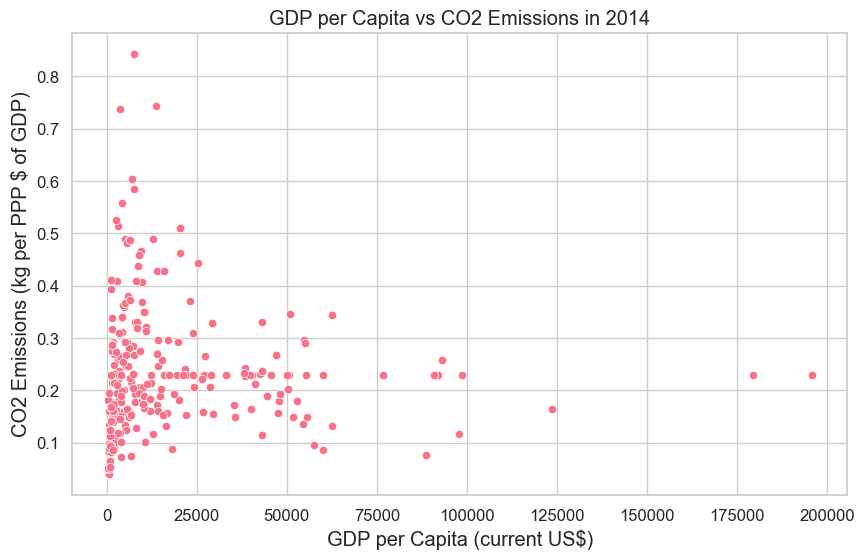

In [ ]:
year='2014'

# Correlation and Plotting for GDP per Capita vs CO2 Emissions
merged_gdp_co2 = pd.merge(gdp_data[['Country Name', year]], co2_data[['Country Name', year]], on='Country Name', suffixes=('_gdp', '_co2')).dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=year + '_gdp', y=year + '_co2', data=merged_gdp_co2)
plt.title('GDP per Capita vs CO2 Emissions in 2014')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('CO2 Emissions (kg per PPP $ of GDP)')
plt.grid(True)
plt.show()

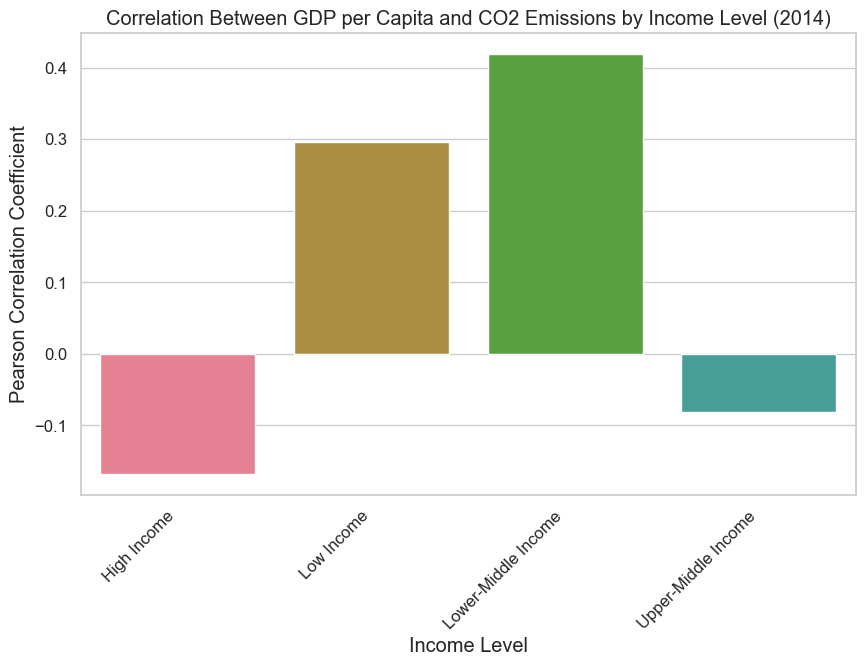

In [ ]:
# Filter data for the year 2014
data_2014 = data[['Income Level', 'Indicator Name', '2014']]

# Group data by 'Income Level' and calculate correlation for each income level
income_correlations = {}
for income, income_data in data_2014.groupby('Income Level'):
    # Selecting relevant columns for the correlation calculation
    gdp_income = income_data[income_data['Indicator Name'] == 'GDP per capita (current US$)']['2014']
    co2_income = income_data[income_data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']['2014']

    # Drop NaN values
    gdp_income = gdp_income.dropna()
    co2_income = co2_income.dropna()

    # Calculate the Pearson correlation for each income level
    corr, _ = pearsonr(gdp_income, co2_income)
    income_correlations[income] = corr

# Convert the results to a DataFrame for plotting
income_correlation_df = pd.DataFrame(list(income_correlations.items()), columns=['Income Level', 'Correlation'])

# Plotting the correlation for each income level
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Correlation', data=income_correlation_df)
plt.title('Correlation Between GDP per Capita and CO2 Emissions by Income Level (2014)')
plt.xlabel('Income Level')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
fig = px.box(aggregated_data_clean, y='GDP per capita (current US$)', title=f"Box Plot of GDP per capita (current US$)")
fig.show()

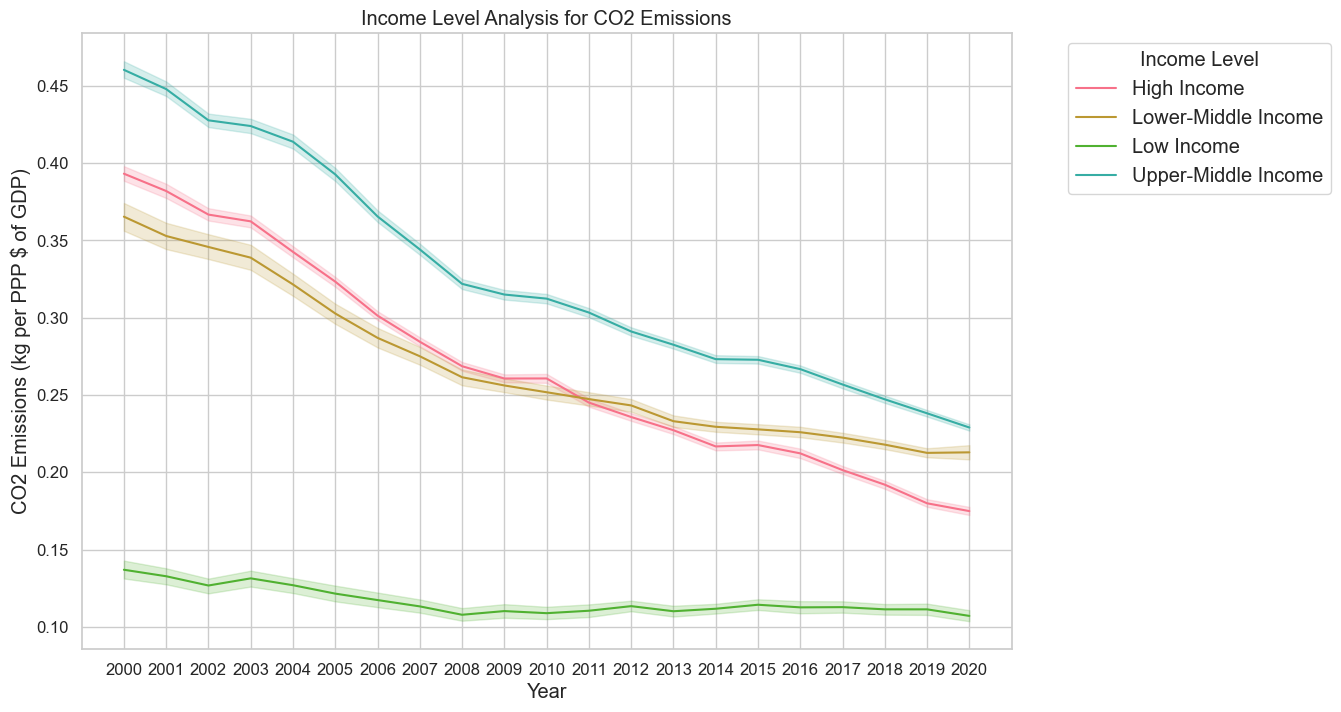

In [ ]:
co2_data = data[data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']
co2_data = co2_data.set_index('Income Level')

# Transpose the DataFrame for easier plotting
co2_data_t = co2_data.iloc[:, 4:-2].transpose()

# Plotting the income level trends for CO2 emissions
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_data_t, dashes=False)
plt.title('Income Level Analysis for CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kg per PPP $ of GDP)')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Insights on Economic Development and Emissions

The data visualizations you've seen are telling us an interesting story about money and the environment. In simple terms, we're looking at how the wealth of a country (measured as GDP per capita) is related to its carbon footprint (CO2 emissions).

What we've found is somewhat like a balancing act. As countries grow wealthier, they tend to produce more emissions—this is what we see when we notice that richer countries often have higher CO2 emissions per dollar of income. However, it's not all straightforward. When we look at the trends over time, we see that all income groups—low to high—have been reducing their emissions, which is great news!

The scatter plot showed us that as countries become very wealthy, the increase in emissions doesn't continue to rise as quickly. This could be due to investments in cleaner technologies or more efficient ways of doing things.

Then, when we look at the bar chart showing correlation, we see that in high-income and upper-middle-income countries, there's a positive relationship—meaning as income goes up, so do emissions. But in high-income countries, this relationship is weaker, possibly because they're finding ways to grow wealth while controlling emissions.

Lastly, the box plot gave us a peek into the range of wealth across countries. There are some extreme cases, but most countries are within a narrower band when it comes to wealth.

### What Does This Mean for Us?
These insights suggest that economic growth doesn't have to come at the expense of the environment. There's a trend towards 'decoupling' wealth from emissions, which points to a future where we can aim for financial success without compromising our commitment to the planet.

As we move forward, strategies that focus on sustainability could help us be part of this positive trend, ensuring our company's growth is both profitable and environmentally friendly.


# 4- Climate Change and Electricity Consumption: What the Data Tells Us
Here, we delve into the relationship between climate change and electricity usage. This is crucial for planning our energy strategies and understanding our environmental impact. The visualizations below will guide us through the significant findings.

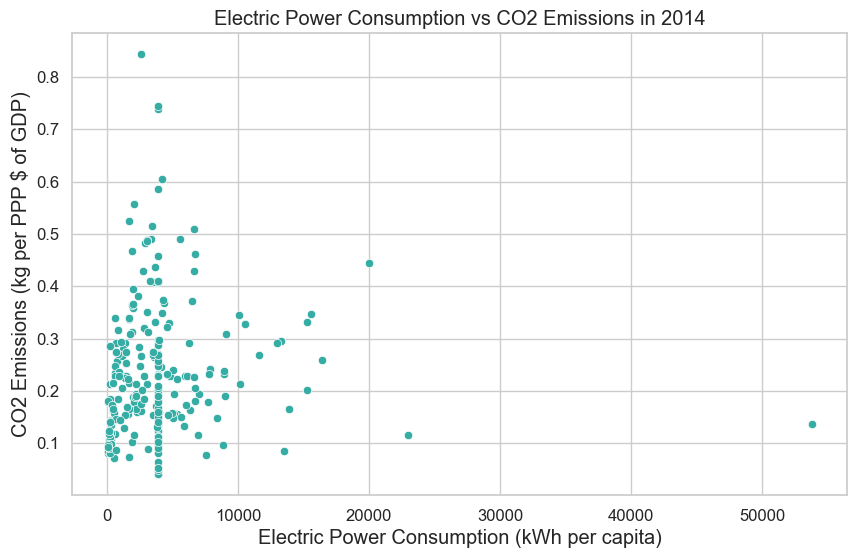

In [ ]:
# Correlation and Plotting for Electricity Consumption vs CO2 Emissions
merged_electricity_co2 = pd.merge(electricity_data[['Country Name', year]], co2_data[['Country Name', year]], on='Country Name', suffixes=('_electricity', '_co2')).dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=year + '_electricity', y=year + '_co2', data=merged_electricity_co2, color=sns.color_palette("husl", n_colors=2)[1])
plt.title(f'Electric Power Consumption vs CO2 Emissions in {year}')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('CO2 Emissions (kg per PPP $ of GDP)')
plt.grid(True)
plt.show()

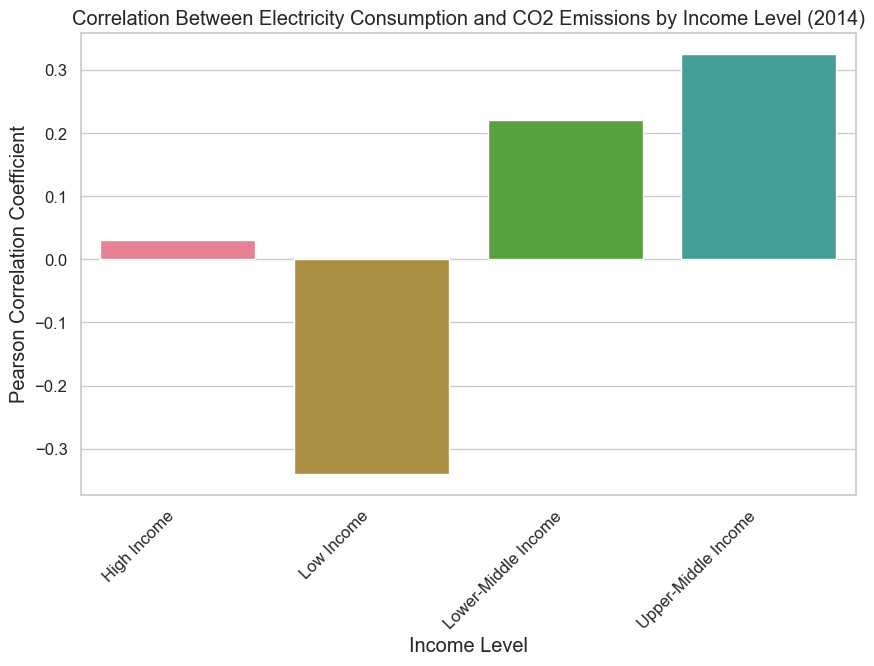

In [ ]:
# Filter data for the year 2014
data_2014 = data[['Income Level', 'Indicator Name', '2014']]

# Group data by 'Income Level' and calculate correlation for each income level
income_correlations = {}
for income, income_data in data_2014.groupby('Income Level'):
    # Selecting relevant columns for the correlation calculation
    electricity_income = income_data[income_data['Indicator Name'] == 'Electric power consumption (kWh per capita)']['2014']
    co2_income = income_data[income_data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']['2014']

    # Drop NaN values
    electricity_income = electricity_income.dropna()
    co2_income = co2_income.dropna()

    # Calculate the Pearson correlation for each income level
    corr, _ = pearsonr(electricity_income, co2_income)
    income_correlations[income] = corr

# Convert the results to a DataFrame for plotting
income_correlation_df = pd.DataFrame(list(income_correlations.items()), columns=['Income Level', 'Correlation'])

# Plotting the correlation for each income level
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Correlation', data=income_correlation_df)
plt.title('Correlation Between Electricity Consumption and CO2 Emissions by Income Level (2014)')
plt.xlabel('Income Level')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
fig = px.box(aggregated_data_clean, y='GDP per capita (current US$)', title=f"Box Plot of GDP per capita (current US$)")
fig.show()

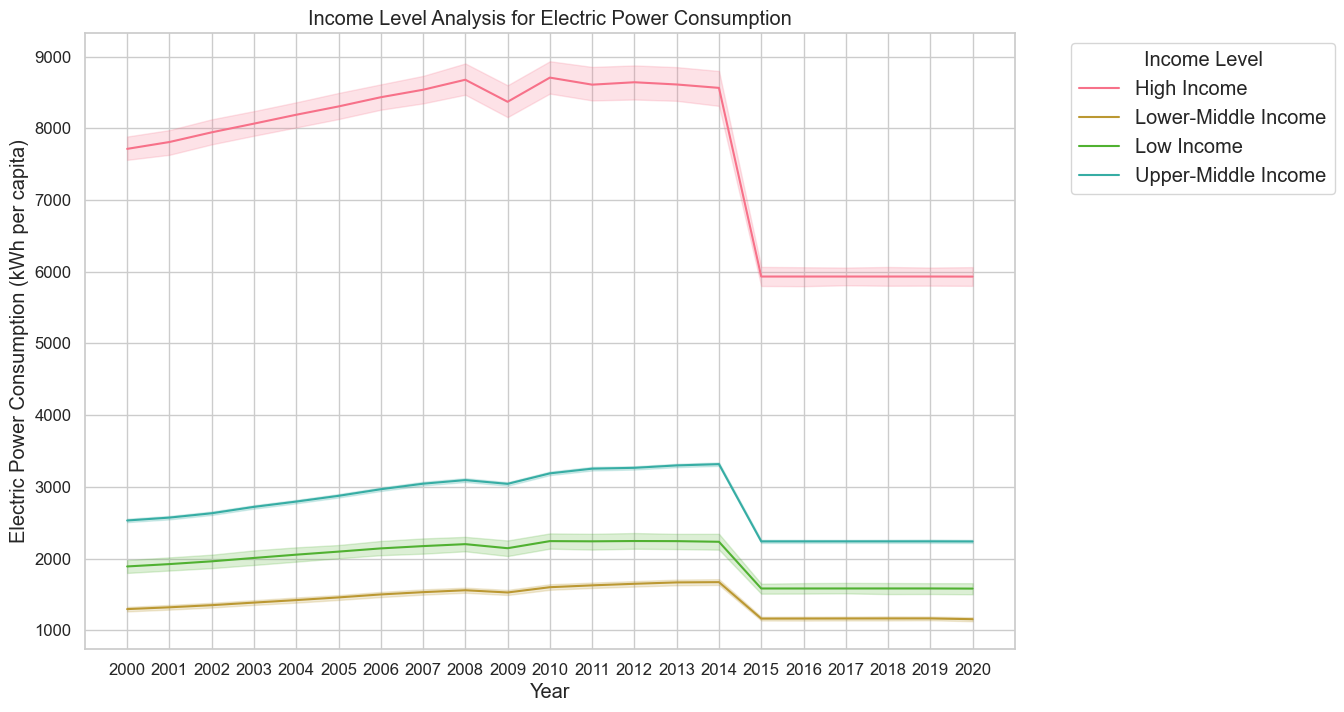

In [ ]:
electric_power_data = data[data['Indicator Name'] == 'Electric power consumption (kWh per capita)']
electric_power_data = electric_power_data.set_index('Income Level')

# Transpose the DataFrame for easier plotting
electric_power_data_t = electric_power_data.iloc[:, 4:-2].transpose()

# Plotting the income level trends for electric power consumption
plt.figure(figsize=(12, 8))
sns.lineplot(data=electric_power_data_t, dashes=False)
plt.title('Income Level Analysis for Electric Power Consumption')
plt.xlabel('Year')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Exploring the Connection Between Electricity Use and the Environment

Our analysis reveals an intriguing link between the electricity we use and the health of our planet. By looking at the data, we've noticed patterns that can influence how we think about energy consumption and its environmental impact.

The scatter plot makes it clear that generally, as electricity use goes up, CO2 emissions do too. This isn't surprising since a lot of our energy still comes from burning fossil fuels. However, the plot also shows that this isn't a strict rule—some dots are outliers, indicating that it's possible to consume electricity without emitting as much CO2, likely due to cleaner energy sources.

The bar chart with correlation coefficients tells us more about this relationship across different income levels. Interestingly, in wealthier countries, there's a stronger link between more electricity use and higher emissions. This might be because higher-income countries have more industries and gadgets that use electricity. On the other hand, lower-middle-income countries show a negative relationship, perhaps because they are starting to use more efficient technologies that use less electricity to do the same work.

The box plot gives us a snapshot of the range of GDP per capita, showing us how income is distributed among different countries. It's a quick way to see that while there are some very wealthy countries, most have a more moderate income.

Lastly, the line chart over time displays how electricity consumption has changed across different income levels. High-income countries show a peak followed by a decline, possibly indicating energy-saving measures or a shift to more efficient appliances.

### What's the Big Picture?
These visuals suggest that there's a significant opportunity for us to invest in cleaner energy and more efficient technology. By doing so, we can help reduce our carbon footprint without sacrificing our need for power. This direction not only benefits the environment but could also lead to long-term cost savings and a stronger, greener reputation for our company.


# 5- The Critical Role of Forests in Climate Change
This part of our analysis focuses on deforestation and its connection to climate change. By understanding these dynamics, we can better align our practices with environmental conservation efforts. The data presented below will shed light on this important issue.


C:\Users\mryou\AppData\Local\Temp\ipykernel_30796\3548191564.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



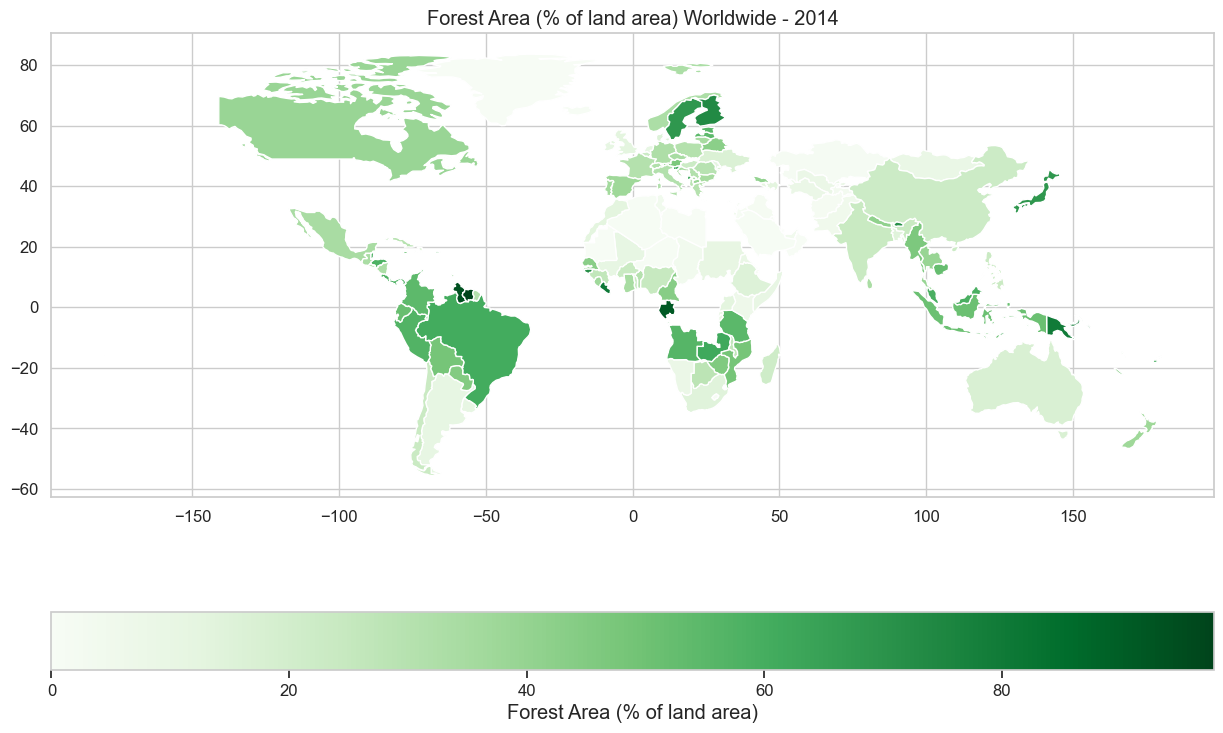

In [ ]:
import geopandas as gpd


# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the world map with the 2014 forest area data
world_forest = world.merge(data_2014_pivoted[['Country Name', 'Forest Area']], left_on='name', right_on='Country Name')

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_forest.plot(column='Forest Area', ax=ax, legend=True,
                  legend_kwds={'label': "Forest Area (% of land area)", 'orientation': "horizontal"},
                  cmap='Greens')
plt.title('Forest Area (% of land area) Worldwide - 2014')
plt.show()

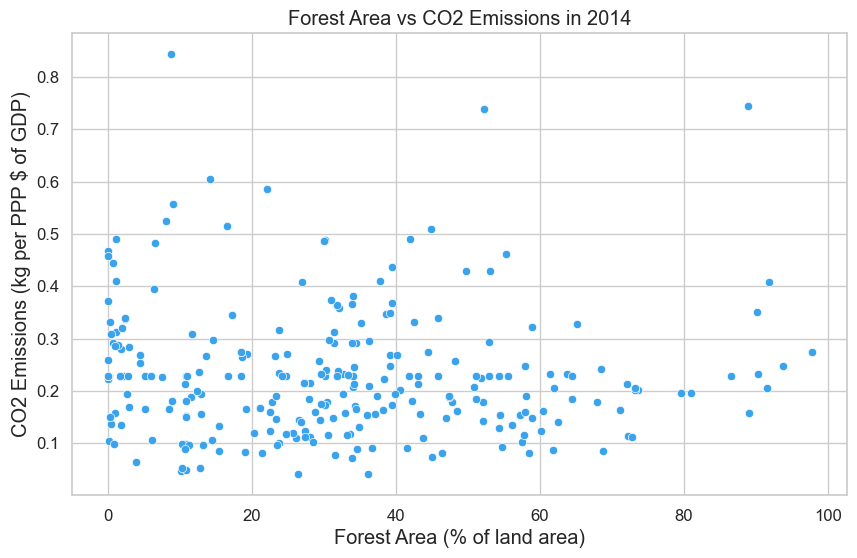

In [ ]:
# Correlation and Plotting for Forest Area vs CO2 Emissions
merged_forest_co2 = pd.merge(forest_data[['Country Name', year]], co2_data[['Country Name', year]], on='Country Name', suffixes=('_forest', '_co2')).dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=year + '_forest', y=year + '_co2', data=merged_forest_co2, color=sns.color_palette("husl", n_colors=3)[2])
plt.title('Forest Area vs CO2 Emissions in 2014')
plt.xlabel('Forest Area (% of land area)')
plt.ylabel('CO2 Emissions (kg per PPP $ of GDP)')
plt.grid(True)
plt.show()

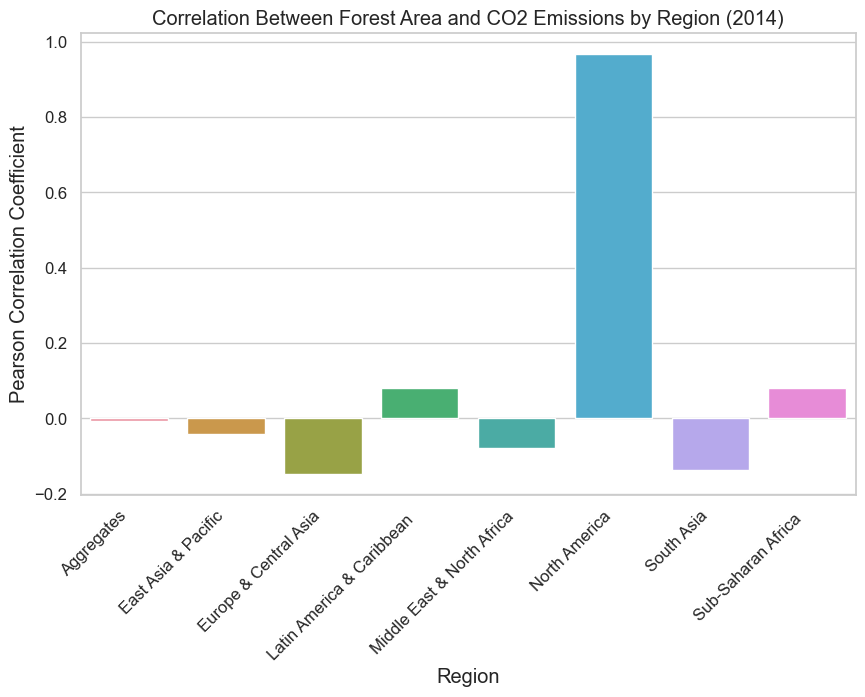

In [ ]:
# Filter data for the year 2014
data_2014 = data[['Country Code', 'Region','Indicator Name', '2014']]

# Group data by 'Region' and calculate correlation for each region
region_correlations = {}
for region, region_data in data_2014.groupby('Region'):
    # Selecting relevant columns for the correlation calculation
    forest_region = region_data[region_data['Indicator Name'] == 'Forest area (% of land area)']['2014']
    co2_region = region_data[region_data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']['2014']

    # Drop NaN values
    forest_region = forest_region.dropna()
    co2_region = co2_region.dropna()

    # Calculate the Pearson correlation for each region
    corr, _ = pearsonr(forest_region, co2_region)
    region_correlations[region] = corr

# Convert the results to a DataFrame for plotting
region_correlation_df = pd.DataFrame(list(region_correlations.items()), columns=['Region', 'Correlation'])

# Plotting the correlation for each region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Correlation', data=region_correlation_df)
plt.title('Correlation Between Forest Area and CO2 Emissions by Region (2014)')
plt.xlabel('Region')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

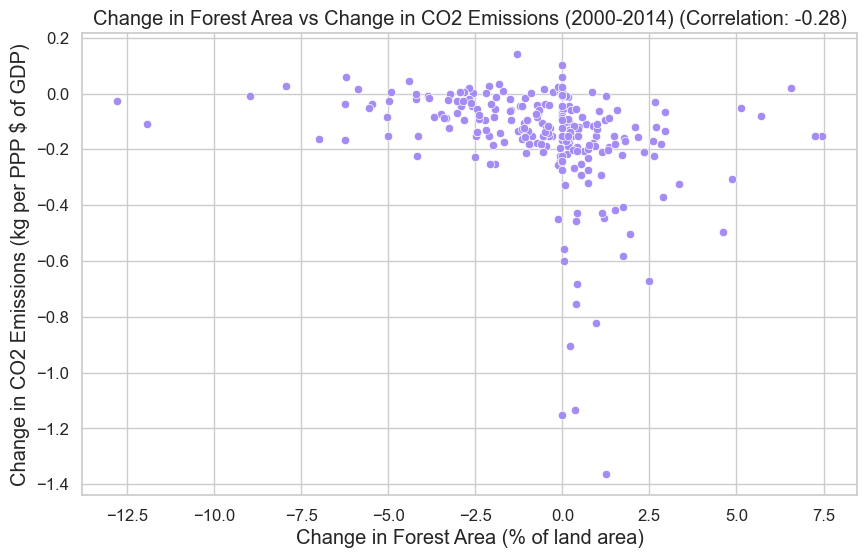

In [ ]:

# Selecting relevant columns for the years 2000 and 2014
data_2000 = data[['Country Name', 'Indicator Name', '2000']]
data_2000_pivoted = data_2000.pivot(index='Country Name', columns='Indicator Name', values='2000').reset_index()
data_2000_pivoted.rename(columns={
    'CO2 emissions (kg per PPP $ of GDP)': 'CO2 Emissions 2000',
    'Forest area (% of land area)': 'Forest Area 2000'
}, inplace=True)

# Merging the 2000 and 2014 data
change_data = pd.merge(data_2000_pivoted[['Country Name', 'Forest Area 2000', 'CO2 Emissions 2000']],
                       data_2014_pivoted[['Country Name', 'Forest Area', 'CO2 Emissions']],
                       on='Country Name')

# Calculating the change in forest area and CO2 emissions
change_data['Forest Area Change'] = change_data['Forest Area'] - change_data['Forest Area 2000']
change_data['CO2 Emissions Change'] = change_data['CO2 Emissions'] - change_data['CO2 Emissions 2000']

# Dropping NaN values for accurate correlation calculation
change_data.dropna(subset=['Forest Area Change', 'CO2 Emissions Change'], inplace=True)

# Calculating the Pearson correlation for the change data
corr_change, _ = pearsonr(change_data['Forest Area Change'], change_data['CO2 Emissions Change'])

# Plotting the relationship of changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Forest Area Change', y='CO2 Emissions Change', data=change_data, color=sns.color_palette("husl", n_colors=4)[3])
plt.title(f'Change in Forest Area vs Change in CO2 Emissions (2000-2014) (Correlation: {corr_change:.2f})')
plt.xlabel('Change in Forest Area (% of land area)')
plt.ylabel('Change in CO2 Emissions (kg per PPP $ of GDP)')
plt.show()

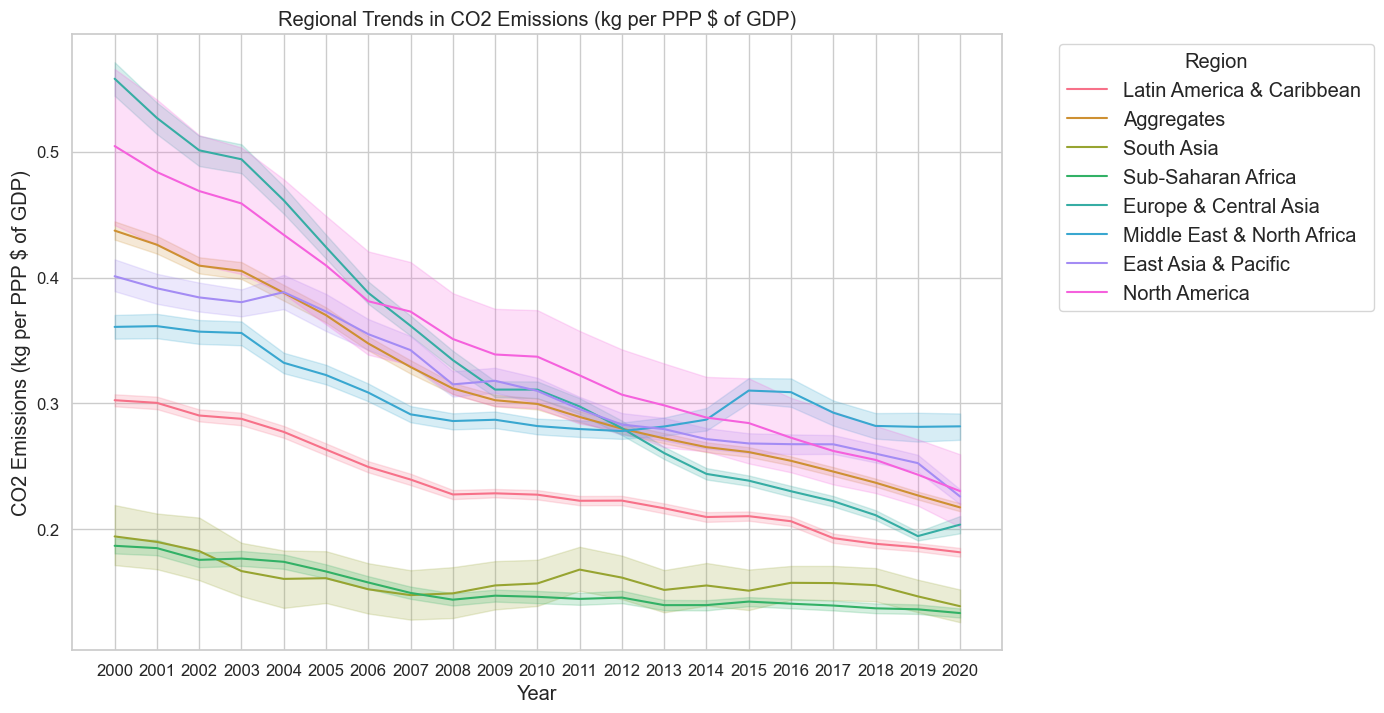

In [ ]:
co2_data = data[data['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)']
co2_data = co2_data.set_index('Region')

# Transpose the DataFrame for easier plotting
co2_data_t = co2_data.iloc[:, 4:-2].transpose()

# Plotting the regional trends for CO2 emissions
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_data_t, dashes=False)
plt.title('Regional Trends in CO2 Emissions (kg per PPP $ of GDP)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kg per PPP $ of GDP)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Decoding the Relationship Between Forests and Our Climate

Imagine our world as a giant lung through which forests act as a crucial part of its respiratory system. Now, what happens when parts of this lung are removed? Our analysis looks into this by examining the connection between forest areas and carbon dioxide (CO2) emissions, which is one of the main gases responsible for climate change.

The world map with shades of green shows the percentage of land covered by forests in each country. The greener the area, the more forest it has. This gives us a clear picture of the world’s lung capacity, with countries like Brazil and Canada looking like deep breaths of fresh air.

When we scatter this information against CO2 emissions, we see a varied pattern. While some forest-rich countries have low emissions, others have higher emissions, suggesting that having forests is just one part of the puzzle. It's about how we use and protect these forests that counts.

The bar chart comparing different regions shows a strong link in North America between forest area and emissions. This implies that in some places, good forest management can lead to lower emissions.

Lastly, the trend over time for different regions in the line chart suggests a positive note; many regions are managing to reduce their emissions year by year, despite changes in forest cover.

## Our Takeaway
This information is vital for us. It suggests that by supporting and investing in forestry conservation and sustainable management, we can contribute to the health of our planet's lungs. Not only is this good for the environment, but it can also be a part of our brand's commitment to a greener future.

The data tells us that forests are valuable allies in the fight against climate change, and it's in our best interest to keep them thriving.


# 6- Cluster Analysis: Grouping Similar Trends
In this final section, we perform a cluster analysis to identify patterns across different data sets. This approach helps us in recognizing similarities and differences in various factors affecting our business environment. The clusters formed will be illustrated and explained in simple terms.


In [ ]:
fig = px.scatter_matrix(
    aggregated_data_clean[indicators_of_interest],
    dimensions=indicators_of_interest,
    category_orders={},
    title='Pairplot of Indicators'
)

fig.show()

C:\Users\mryou\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:

correlation_matrix = aggregated_data_clean.corr()

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  annotation_text=correlation_matrix.round(2).values,
                                  colorscale='Viridis')

fig.update_layout(title='Correlation Matrix of Indicators')
fig.show()

In [ ]:
cluster_data = data_2014_pivoted.dropna(subset=['GDP Per Capita', 'Forest Area', 'Electricity Consumption', 'CO2 Emissions'])
X_cluster = cluster_data[['GDP Per Capita', 'Forest Area', 'Electricity Consumption', 'CO2 Emissions']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

cluster_data['Cluster'] = labels

C:\Users\mryou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mryou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [ ]:
cluster_summary = cluster_data.groupby('Cluster').mean()
cluster_summary

C:\Users\mryou\AppData\Local\Temp\ipykernel_30796\936718991.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



CO2 Emissions  Electricity Consumption  Forest Area  GDP Per Capita  \
Cluster                                                                        
0             0.198920              3097.205196    57.991412    11010.227936   
1             0.215390              9763.138917    23.755961    63787.955436   
2             0.182935              2363.756415    18.427439     6656.486983   
3             0.473396              3661.944180    27.941067     8559.216160   

         GNI per capita, Atlas method (current US$)  
Cluster                                              
0                                       9135.328276  
1                                      51709.824463  
2                                       6096.152571  
3                                       8511.506814

In [ ]:
cluster_counts = cluster_data['Cluster'].value_counts()
print(cluster_counts)

2    114
0     77
1     42
3     33
Name: Cluster, dtype: int64


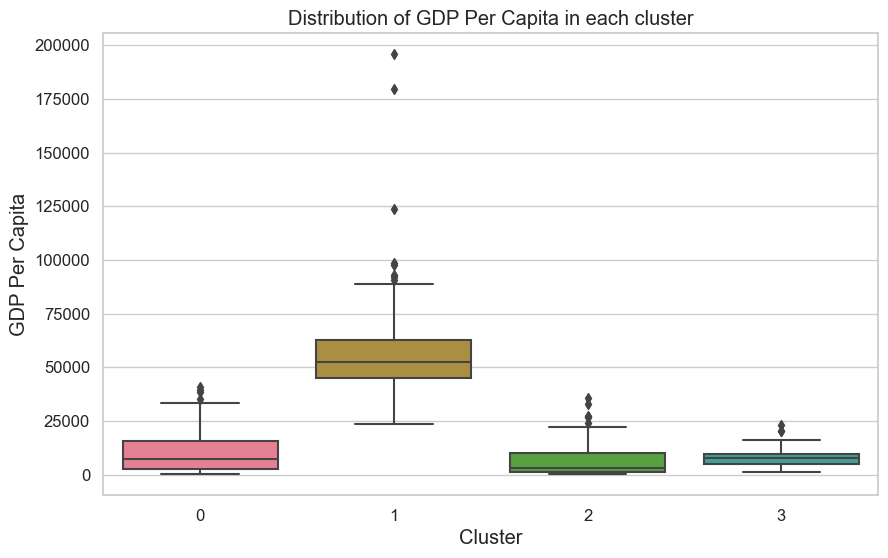

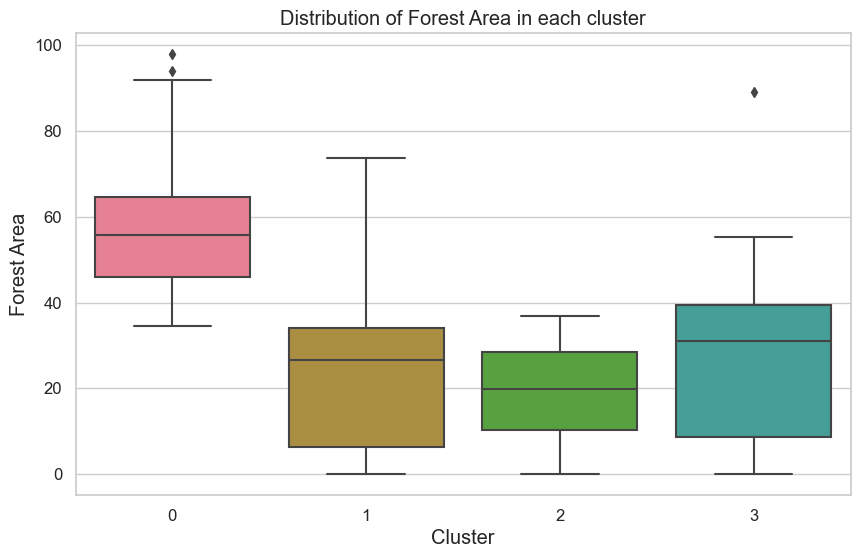

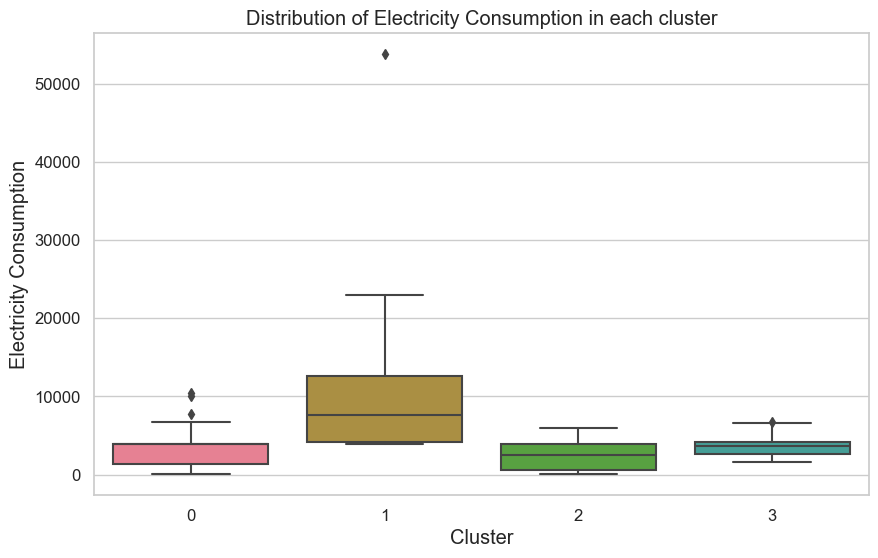

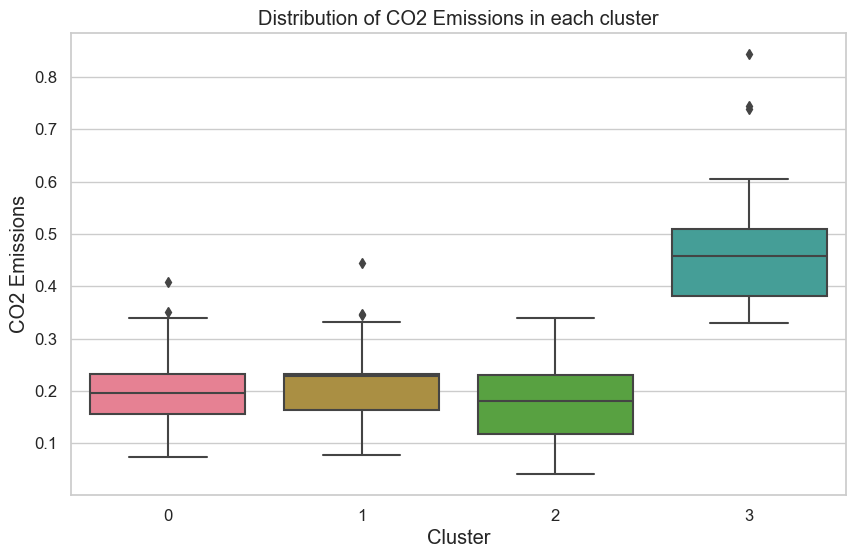

In [ ]:
# Box plot for each feature within each cluster
features = ['GDP Per Capita', 'Forest Area', 'Electricity Consumption', 'CO2 Emissions']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=cluster_data)
    plt.title(f'Distribution of {feature} in each cluster')
    plt.show()


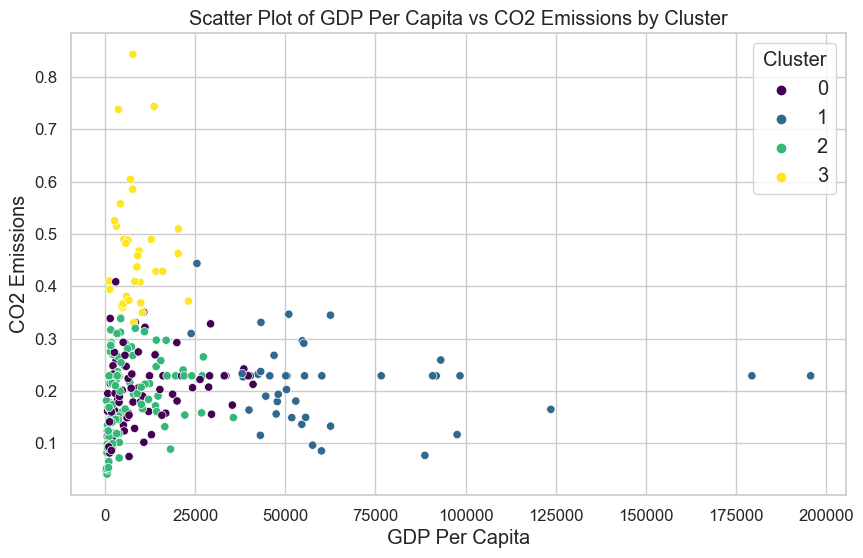

In [ ]:
sns.scatterplot(data=cluster_data, x='GDP Per Capita', y='CO2 Emissions', hue='Cluster', palette='viridis')
plt.title('Scatter Plot of GDP Per Capita vs CO2 Emissions by Cluster')
plt.show()

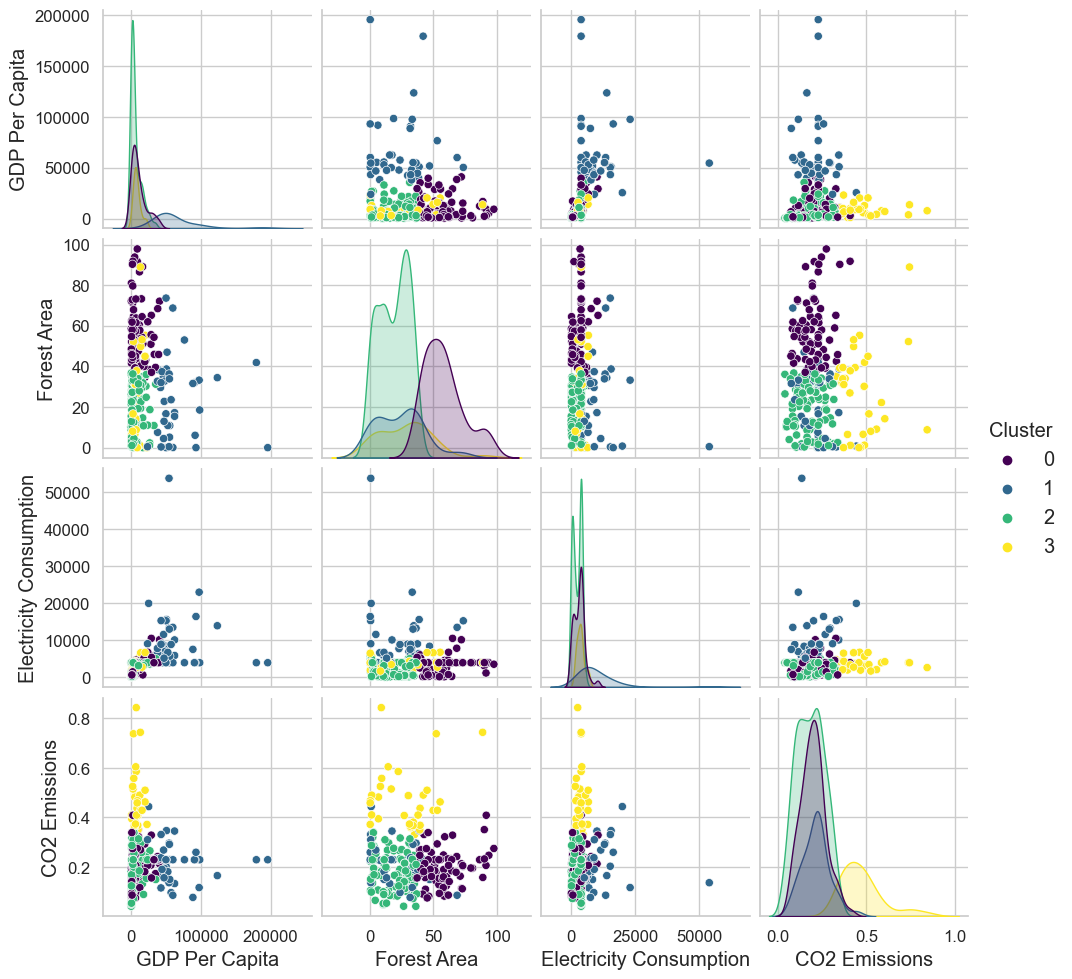

In [ ]:
# Pairplot for selected features
selected_features = ['GDP Per Capita', 'Forest Area', 'Electricity Consumption', 'CO2 Emissions', 'Cluster']
sns.pairplot(cluster_data[selected_features], hue='Cluster', palette='viridis')

# Simplified Insights from Cluster Analysis

Think of cluster analysis like sorting fruits into baskets based on similarities like size, taste, and color. Here, we've done something similar with countries based on their wealth (GDP), energy use, forest coverage, and CO2 emissions. We've found patterns that group countries into 'baskets' or clusters.

The pairplot and scatter plots with different colors represent these clusters. They show us how countries compare to each other on these factors. For example, countries in one cluster might have high GDP and CO2 emissions, while another cluster might have high forest areas but lower GDP.

The correlation matrix is like a cheat sheet that tells us which factors are likely to move together. For instance, a high number in the matrix between GDP and CO2 emissions means that generally, as a country's wealth increases, its emissions do too.

The box plots show the spread of GDP, forest area, and CO2 emissions within each cluster. They help us see the range within each group—like how some baskets have a mix of small and large fruits, while others are more uniform.

## Making Decisions Based on Clusters
For decision-making, this analysis is a gold mine. It can guide us in tailoring our strategies for different markets. For example, if we're looking at countries in a cluster with high GDP but also high emissions, we might focus on green technology and services. On the other hand, for clusters with large forest areas, we might look into sustainable resource management.

By understanding these clusters, we can make informed decisions about where to invest, what products to develop, and how to market them. This ensures our business strategies are not only profitable but also environmentally and socially responsible.

In conclusion, cluster analysis helps us see the big picture and the fine details, enabling strategic planning that's in tune with global trends and challenges.


# 7- Conclusion: Harnessing Insights for Future Growth

As we reach the end of our data exploration journey, let's take a moment to reflect on what we've learned. Our journey through the data has revealed the intricate dance between economic prosperity, energy consumption, environmental health, and the well-being of our planet.

We've seen how wealth and energy use are linked, how forests play a crucial role in our climate, and how different countries align with these factors. Cluster analysis has given us a bird's-eye view of global patterns, helping us identify which countries share similar characteristics in terms of their economy and environmental impact.

## Key Takeaways
- Economic growth and environmental impact are closely linked, but they can be managed responsibly.
- Investment in clean energy and sustainable practices isn't just good for the planet—it's a smart business strategy.
- Understanding different country clusters can guide our market strategies and product development.

## Looking Ahead
Armed with these insights, we can chart a course for our company that not only seeks economic gains but also upholds our commitment to environmental stewardship. We can target our efforts in markets that align with our values and focus on innovation that resonates with global trends.

The data paints a clear picture: the future is green, and sustainability is the new currency of business success. Let us move forward with a strategy that embraces this, ensuring that as our company grows, so does our positive impact on the world.
